In [91]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('IMP-PCMLAI-M6-Uni_Ranking.csv')

In [3]:
df.head()

,Unnamed: 0,research_rank,student_staff_ratio_rank,num_students_rank,world_rank,university_name
0,169,182,190,1,167.0,Technical University of Denmark
1,30,54,150,2,31.0,École Polytechnique Fédérale de Lausanne
2,158,187,193,3,158.0,University of Rochester
3,133,173,182,4,133.0,Case Western Reserve University
4,47,55,71,5,47.0,Wageningen University and Research Center


### THIS SECTION IS FOR RESEARCH RANK NUMBERS

In [61]:
df_research_rank = df[['research_rank','world_rank']]

In [62]:
df_research_rank.head()

,research_rank,world_rank
0,182,167.0
1,54,31.0
2,187,158.0
3,173,133.0
4,55,47.0


In [51]:
df_research_rank_sorted = df_research_rank.sort_values('research_rank', ascending=False)

In [52]:
df_research_rank_sorted.head()

,research_rank,world_rank
138,200,196.0
16,199,195.0
165,198,161.0
87,197,199.0
12,196,180.0


In [63]:
research_rank_regressor = np.cumsum(df_research_rank_sorted['world_rank'])


In [64]:
outcome_value = np.sort(df['research_rank'])
outcome_value= outcome_value[::-1]


In [65]:
perfect_regressor = np.cumsum(outcome_value)

In [66]:
research_rank_regressor 

138      196.0
16       391.0
165      552.0
87       751.0
12       931.0
        ...   
161    19976.0
146    19980.0
141    19981.0
143    19983.0
136    19989.0
Name: world_rank, Length: 200, dtype: float64

In [67]:
perfect_regressor

array([  200,   399,   597,   794,   990,  1185,  1379,  1572,  1764,
        1955,  2145,  2334,  2522,  2709,  2895,  3080,  3264,  3447,
        3629,  3810,  3990,  4169,  4347,  4524,  4700,  4875,  5049,
        5222,  5394,  5565,  5735,  5904,  6072,  6239,  6405,  6570,
        6734,  6897,  7059,  7220,  7380,  7539,  7697,  7854,  8010,
        8165,  8319,  8472,  8624,  8775,  8925,  9074,  9222,  9369,
        9515,  9660,  9804,  9947, 10089, 10230, 10370, 10509, 10647,
       10784, 10920, 11055, 11189, 11322, 11454, 11585, 11715, 11844,
       11972, 12099, 12225, 12350, 12474, 12597, 12719, 12840, 12960,
       13079, 13197, 13314, 13430, 13545, 13659, 13772, 13884, 13995,
       14105, 14214, 14322, 14429, 14535, 14640, 14744, 14847, 14949,
       15050, 15150, 15249, 15347, 15444, 15540, 15635, 15729, 15822,
       15914, 16005, 16095, 16184, 16272, 16359, 16445, 16530, 16614,
       16697, 16779, 16860, 16940, 17019, 17097, 17174, 17250, 17325,
       17399, 17472,

In [68]:
i_values = range(1,len(df_sorted)+1)

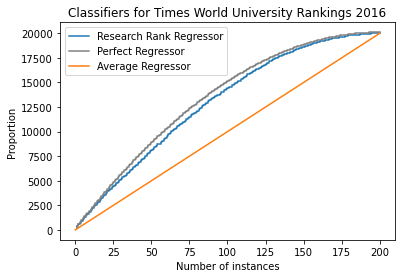

In [82]:
plt.step(i_values,research_rank_regressor,label='Research Rank Regressor')
plt.step(i_values,perfect_regressor,label='Perfect Regressor',color='gray', linestyle='-')
plt.plot([0,200],[0,np.sum(df_sorted['world_rank'])],label='Average Regressor')
plt.xlabel('Number of instances')
plt.ylabel('Proportion')
plt.title('Classifiers for Times World University Rankings 2016')
plt.legend()
plt.show()

In [70]:
# Define the actual and predicted values
y_actual = df_research_rank_sorted['world_rank']
y_predicted = df_research_rank_sorted['research_rank']

# Calculate the MSE for the perfect and average classifiers
mse_perfect = np.mean((np.cumsum(outcome_value) - perfect_regressor)**2)
mse_average = np.mean((y_actual - np.mean(y_actual)) ** 2)

# Calculate the MSE for the regressor
mse_regressor = np.mean((y_actual - y_predicted) ** 2)

# Print the MSE values
print('MSE of the perfect classifier:', mse_perfect)
print('MSE of the average classifier:', mse_average)
print('MSE of the research_rank_regressor:', mse_regressor)


MSE of the perfect classifier: 0.0
MSE of the average classifier: 3298.7719749999997
MSE of the research_rank_regressor: 766.885


### THIS SECTION IS FOR NUMBER OF STUDENTS

In [71]:
df_num_students_rank = df[['num_students_rank','world_rank']]
df_num_students_rank.head()

,num_students_rank,world_rank
0,1,167.0
1,2,31.0
2,3,158.0
3,4,133.0
4,5,47.0


In [72]:
df_num_students_rank_sorted = df_num_students_rank.sort_values('num_students_rank', ascending=False)

In [73]:
df_num_students_rank_sorted.head()

,num_students_rank,world_rank
199,200,131.0
198,199,23.0
197,198,127.0
196,197,164.0
195,196,175.0


In [74]:
num_students_rank_regressor = np.cumsum(df_num_students_rank_sorted['world_rank'])

In [75]:
outcome_value = np.sort(df['num_students_rank'])
outcome_value= outcome_value[::-1]

In [76]:
perfect_regressor = np.cumsum(outcome_value)

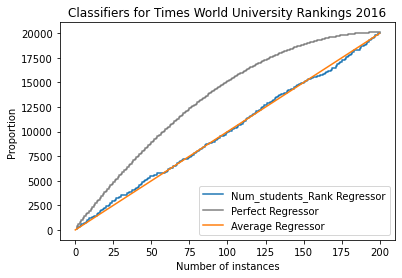

In [80]:
plt.step(i_values,num_students_rank_regressor,label='Num_students_Rank Regressor')
plt.step(i_values,perfect_regressor,label='Perfect Regressor',color='gray', linestyle='-')
plt.plot([0,200],[0,np.sum(df_sorted['world_rank'])],label='Average Regressor')
plt.xlabel('Number of instances')
plt.ylabel('Proportion')
plt.title('Classifiers for Times World University Rankings 2016')
plt.legend()
plt.show()

In [93]:
# Define the actual and predicted values
y_actual = df_num_students_rank_sorted['world_rank']
y_predicted = df_num_students_rank_sorted['num_students_rank']

# Calculate the MSE for the perfect and average classifiers
mse_perfect = np.mean((np.cumsum(outcome_value) - perfect_regressor)**2)
mse_average = np.mean((y_actual - np.mean(y_actual)) ** 2)

# Calculate the MSE for the regressor
mse_regressor = np.mean((y_actual - y_predicted) ** 2)

# Print the MSE values
print('MSE of the perfect classifier:', mse_perfect)
print('MSE of the average classifier:', mse_average)
print('MSE of the num_students_rank_regressor:', mse_regressor)


MSE of the perfect classifier: 0.0
MSE of the average classifier: 3298.7719749999997
MSE of the num_students_rank_regressor: 6686.945


### THIS SECTION IS FOR STUDENT STAFF RATIO RANK

In [83]:
df_staff_rank = df[['student_staff_ratio_rank','world_rank']]
df_staff_rank.head()

,student_staff_ratio_rank,world_rank
0,190,167.0
1,150,31.0
2,193,158.0
3,182,133.0
4,71,47.0


In [84]:
df_staff_rank_sorted = df_staff_rank.sort_values('student_staff_ratio_rank', ascending=False)

In [85]:
df_staff_rank_sorted.head()

,student_staff_ratio_rank,world_rank
199,200,131.0
198,199,23.0
167,198,11.0
181,197,87.0
90,196,82.0


In [86]:
staff_rank_regressor = np.cumsum(df_staff_rank_sorted['world_rank'])

In [87]:
outcome_value = np.sort(df['student_staff_ratio_rank'])
outcome_value= outcome_value[::-1]

In [88]:
perfect_regressor = np.cumsum(outcome_value)

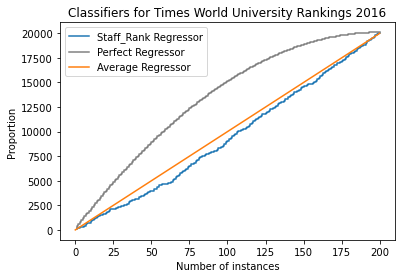

In [89]:
plt.step(i_values,staff_rank_regressor,label='Staff_Rank Regressor')
plt.step(i_values,perfect_regressor,label='Perfect Regressor',color='gray', linestyle='-')
plt.plot([0,200],[0,np.sum(df_sorted['world_rank'])],label='Average Regressor')
plt.xlabel('Number of instances')
plt.ylabel('Proportion')
plt.title('Classifiers for Times World University Rankings 2016')
plt.legend()
plt.show()

In [90]:
# Define the actual and predicted values
y_actual = df_staff_rank_sorted['world_rank']
y_predicted = df_staff_rank_sorted['student_staff_ratio_rank']

# Calculate the MSE for the perfect and average classifiers
mse_perfect = np.mean((np.cumsum(outcome_value) - perfect_regressor)**2)
mse_average = np.mean((y_actual - np.mean(y_actual)) ** 2)

# Calculate the MSE for the regressor
mse_regressor = np.mean((y_actual - y_predicted) ** 2)

# Print the MSE values
print('MSE of the perfect classifier:', mse_perfect)
print('MSE of the average classifier:', mse_average)
print('MSE of the staff_rank_regressor:', mse_regressor)


MSE of the perfect classifier: 0.0
MSE of the average classifier: 3298.7719749999983
MSE of the research_rank_regressor: 8021.615
